In [1]:
import numpy as np
import ROOT
import Common

Welcome to JupyROOT 6.28/00


In [2]:
Markerset = [20, 21, 33, 34, 29, 24, 25, 33, 27, 28, 30, 3,  5,  42, 43, 46, 47, 48, 49, 50, 51, 20, 21, 33, 34, 29, 24, 25, 26]
Markerset_size = [1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

ROOT.TGaxis.SetMaxDigits(3)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
ROOT.gStyle.SetLegendBorderSize(0)

cRatio = Common.GetCanvas("cRatio", 720, 720)
cRatio.SetLeftMargin(0.15)
cRatio.SetBottomMargin(0.15)

cYields = Common.GetCanvas("cYields", 720, 720)
cYields.SetLeftMargin(0.15)
cYields.SetBottomMargin(0.15)

cMeanpT = Common.GetCanvas("cMeanpT", 720, 720)
cMeanpT.SetLeftMargin(0.15)
cMeanpT.SetBottomMargin(0.15)

cRatioPi = Common.GetCanvas("cRatioPi", 720, 720)
cRatioPi.SetLeftMargin(0.15)
cRatioPi.SetBottomMargin(0.15)

In [3]:
fEffi_b2 = ROOT.TFile("../../output/LHC22cde_pass4_INEL/common/efficiency_1_b11.root")
fEffi_b11 = ROOT.TFile("../../output/LHC22cde_pass4_INEL/common/efficiency_1_c1.root")

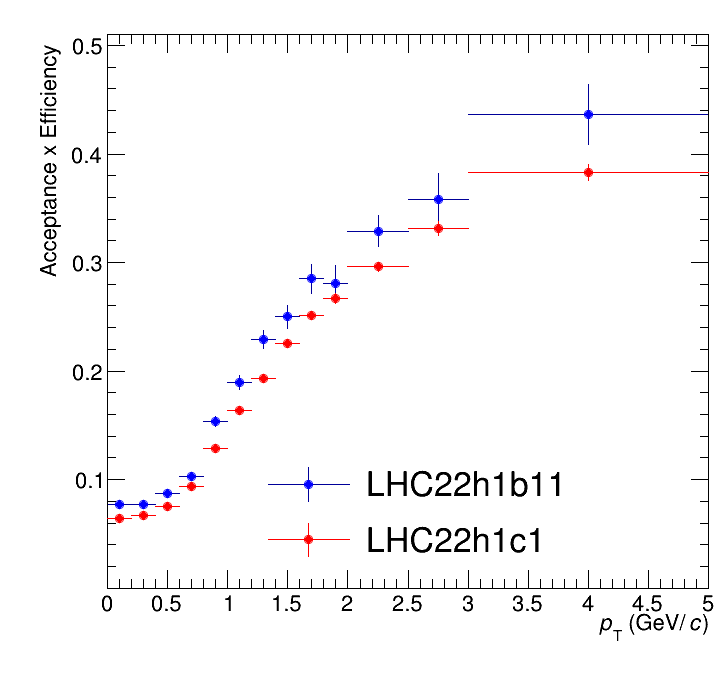

In [4]:
hEffi_b2 = fEffi_b2.Get("lf-k892analysis/hEfficiency_cen0")
hEffi_b11 = fEffi_b11.Get("lf-k892analysis/hEfficiency_cen0")
hEffi_b11.SetLineColor(ROOT.kRed)

hEffi_b2.SetMarkerStyle(20)
hEffi_b11.SetMarkerStyle(20)
hEffi_b2.SetMarkerColor(ROOT.kBlue)
hEffi_b11.SetMarkerColor(ROOT.kRed)
hEffi_b2.SetMaximum(0.51)

lSigBkg = ROOT.TLegend(0.35, 0.18, 1.00, 0.34)
lSigBkg.SetFillStyle(0)
lSigBkg.AddEntry(hEffi_b2, "LHC22h1b11", "PEL")
lSigBkg.AddEntry(hEffi_b11, "LHC22h1c1", "PEL")

cRatio.cd()
hEffi_b2.Draw()
hEffi_b11.Draw("same")
lSigBkg.Draw()
cRatio.Draw()

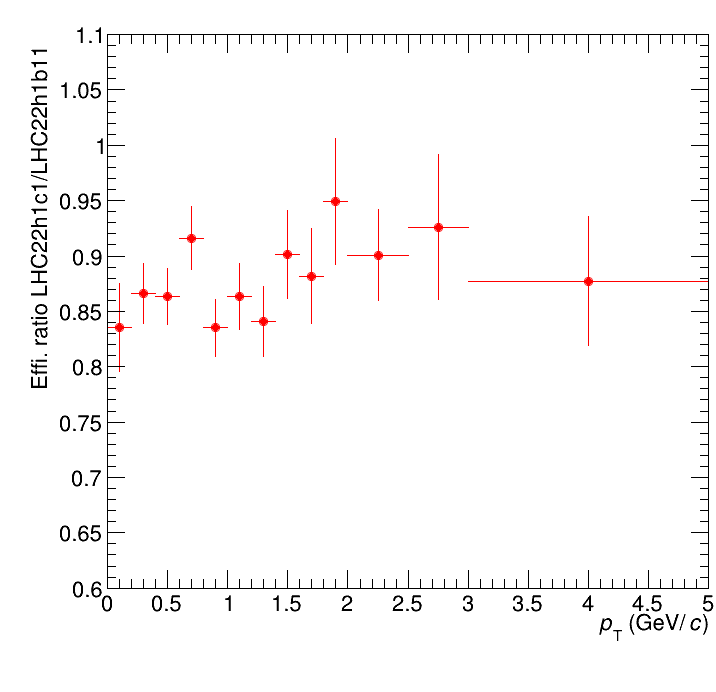

In [7]:
hEffi_b2_ratio = hEffi_b11.Clone()
hEffi_b2_ratio.Divide(hEffi_b2)

hEffi_b2_ratio.GetYaxis().SetTitle("Effi. ratio LHC22h1c1/LHC22h1b11")
hEffi_b2_ratio.SetMinimum(0.6)
hEffi_b2_ratio.SetMaximum(1.1)

cYields.cd()
hEffi_b2_ratio.Draw()
cYields.Draw()

0.047497416423538
0.038637794134421734
0.039450601658603326
0.02417357921212393
0.047592353968654785
0.039459592736600664
0.04602622819499959
0.02838256212691799
0.034094916124434195
0.014598486425621598
0.028644755489325713
0.02129979811198308
0.03542126946191168


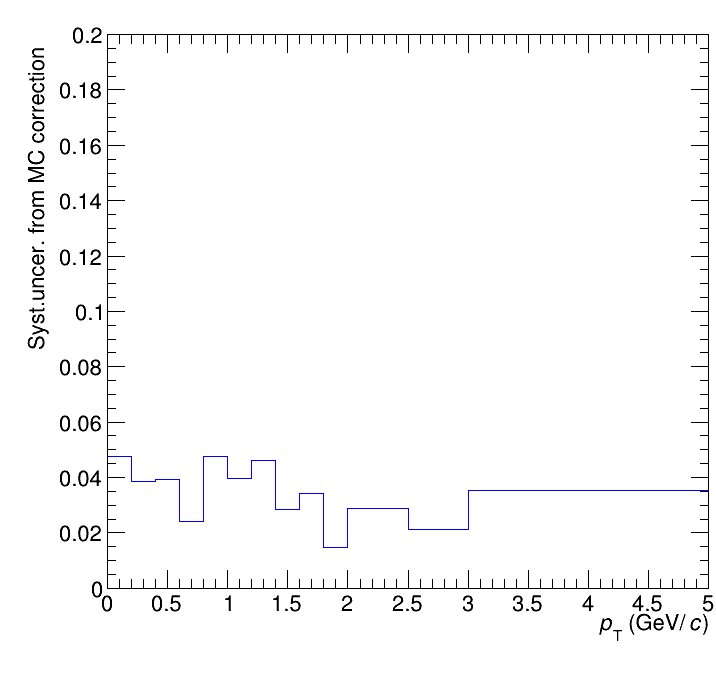

In [8]:
hEffi_b2_ratio_err = hEffi_b2_ratio.Clone()

hEffi_b2_ratio_err.GetYaxis().SetTitle("Syst.uncer. from MC correction")
for iBin in range(13):
    value = abs(1-hEffi_b2_ratio_err.GetBinContent(iBin+1))/np.sqrt(12)
    print(value)
    hEffi_b2_ratio_err.SetBinContent(iBin+1,value)
    hEffi_b2_ratio_err.SetBinError(iBin+1,0)

hEffi_b2_ratio_err.SetLineColor(ROOT.kBlue)
hEffi_b2_ratio_err.SetMinimum(0)    
hEffi_b2_ratio_err.SetMaximum(0.2)   
cYields.cd()
hEffi_b2_ratio_err.Draw()
cYields.Draw()